<a href="https://colab.research.google.com/github/kartik-das/Covid-19-Detection-Through-Chest-X-Ray-Images-A-Deep-Learning-Approach/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir=r'/content/drive/MyDrive/Curated S Dataset/train'
validation_dir=r'/content/drive/MyDrive/Curated S Dataset/val'
test_dir=r'/content/drive/MyDrive/Curated S Dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [ ]:
train_datagenerator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

Found 6485 images belonging to 3 classes.


In [ ]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator=valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

Found 1851 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:

conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16,813,124
Trainable params: 16,813,124
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
history=model.fit(
    train_datagenerator,
    steps_per_epoch=train_datagenerator.n/train_datagenerator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n/validation_generator.batch_size
)

Epoch 1/50
202/202 [==============================] - 1659s 8s/step - loss: 1.2031 - accuracy: 0.4958 - val_loss: 1.0119 - val_accuracy: 0.5030
Epoch 2/50
202/202 [==============================] - 230s 1s/step - loss: 1.0138 - accuracy: 0.4944 - val_loss: 1.0083 - val_accuracy: 0.5030
Epoch 3/50
202/202 [==============================] - 225s 1s/step - loss: 1.0012 - accuracy: 0.4944 - val_loss: 1.1170 - val_accuracy: 0.5030
Epoch 4/50
202/202 [==============================] - 221s 1s/step - loss: 0.8562 - accuracy: 0.5915 - val_loss: 0.5044 - val_accuracy: 0.7823
Epoch 5/50
202/202 [==============================] - 220s 1s/step - loss: 0.6192 - accuracy: 0.7385 - val_loss: 0.4544 - val_accuracy: 0.8131
Epoch 6/50
202/202 [==============================] - 219s 1s/step - loss: 0.4826 - accuracy: 0.8102 - val_loss: 0.3774 - val_accuracy: 0.8574
Epoch 7/50
202/202 [==============================] - 219s 1s/step - loss: 0.4858 - accuracy: 0.8057 - val_loss: 0.3314 - val_accuracy: 0.894

In [ ]:
model.save('vgg_16_model.h5')


In [ ]:
from keras.models import load_model
model = load_model('vgg_16_model.h5')

In [ ]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from tensorflow.keras import optimizers
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D


import numpy as np
from IPython.display import Image
from tensorflow.keras import optimizers

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150,150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


img_path = '/content/drive/MyDrive/Splitted dataset/val/Pneumonia-Bacterial/Pneumonia-Bacterial (10).jpg'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred = np.argmax(pred)
pred

2

In [ ]:
score = model.evaluate_generator(validation_generator)
print('final val_loss:', score[0])
print('final val_acc:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


final val_loss: 0.15297046303749084
final val_acc: 0.9497568607330322


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Confusion Matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in valid_datagen.flow_from_directory(data_path, target_size=(150,150), shuffle=False, batch_size= 64):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


cm = get_confusion_matrix(train_dir, 6484 )
print(cm)
valid_cm = get_confusion_matrix(test_dir, 930 )
print(valid_cm)

Confusion Matrix 6484
Found 6485 images belonging to 3 classes.
50
100
[[ 876   28   26]
 [  10 2173  111]
 [  11   67 3183]]
Confusion Matrix 1851
Found 930 images belonging to 3 classes.
[[252   8   8]
 [  4 630  24]
 [  4  16 914]]


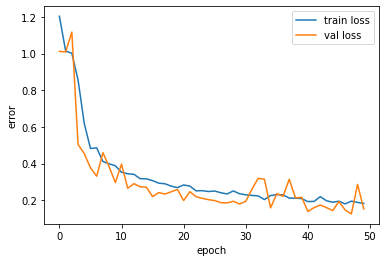

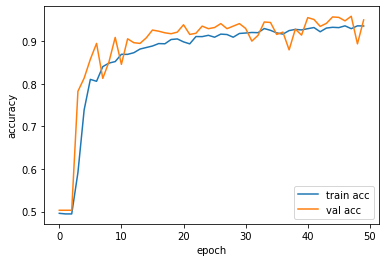

In [ ]:
# plot some data:

# loss:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

# accuracies:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
labels = ['Covid', 'Normal', 'Other']

Confussion Matrix
[[ 876   28   26]
 [  10 2173  111]
 [  11   67 3183]]


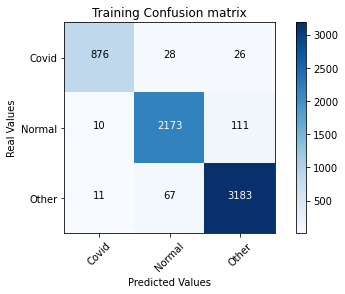

Confussion Matrix
[[252   8   8]
 [  4 630  24]
 [  4  16 914]]


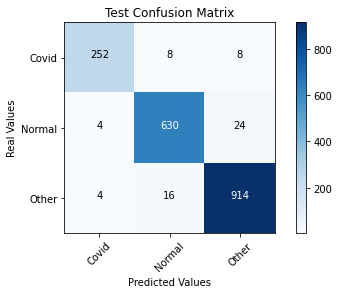

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues,
                          sv_dir=None):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized Confusion Matrix")
  else:
      print('Confussion Matrix')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Real Values')
  plt.xlabel('Predicted Values')
  if sv_dir is not None:
    plt.savefig(sv_dir)
  plt.show()


def y2indicator(Y):
  K = len(set(Y))
  N = len(Y)
  I = np.empty((N, K))
  I[np.arange(N), Y] = 1
  return I
plot_confusion_matrix(
  cm,
  labels,
  title='Training Confusion matrix'
)

plot_confusion_matrix(
  valid_cm,
  labels,
  title='Test Confusion Matrix'
)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("[INFO] evaluating network...")
N=900
predictions = []
targets = []
i = 0
for x, y in valid_datagen.flow_from_directory(test_dir, target_size=(150,150), shuffle=False, batch_size= 64):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

print(classification_report(targets, predictions, target_names=labels))

[INFO] evaluating network...
Found 930 images belonging to 3 classes.
              precision    recall  f1-score   support

       Covid       0.97      0.94      0.95       134
      Normal       0.96      0.96      0.96       329
       Other       0.97      0.98      0.97       467

    accuracy                           0.97       930
   macro avg       0.97      0.96      0.96       930
weighted avg       0.97      0.97      0.97       930

